# Loan Application Status Prediction

In [201]:
#importing all the required library.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')


# Examining the Data

In [79]:
#reading loan prediction dataset
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [81]:
#analysing dataset head
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [82]:
#droping Loan_id column
df=df.drop(columns=['Loan_ID'])

In [83]:
# categorical data
categorical_columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History','Loan_Amount_Term']
print(categorical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']


In [84]:
# numerical data
numerical_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount']
print(numerical_columns)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [85]:
#checking information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


* there are  float64(4), int64(1), object(7) type   of data
* there are no null values 

In [86]:
#checking data shape
df.shape

(614, 12)

* there are 614 rows 12 columns

In [87]:
# checking data type
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

* there are two types of dataset

In [88]:
#checking dataset columns
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

* there are 12 columns

In [89]:
#checking null values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* Dataset contains some null values

# Summary Statistics

In [90]:
#describing dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


* There are some missing values
* The mean is more than median in some of the       columns
* There are extreme outliers in some of the         columns

In [91]:
#loan status
df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [92]:
#value count
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

* There are X and Y categories 

# Data Visualizations

<AxesSubplot:xlabel='Gender', ylabel='count'>

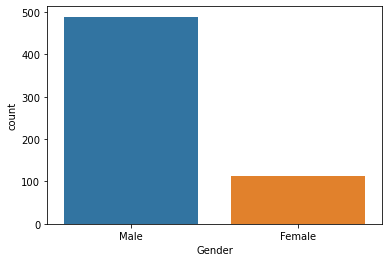

In [93]:
sns.countplot(df['Gender'])

* Here data not distributed normally in these       columns.

<AxesSubplot:xlabel='Married', ylabel='count'>

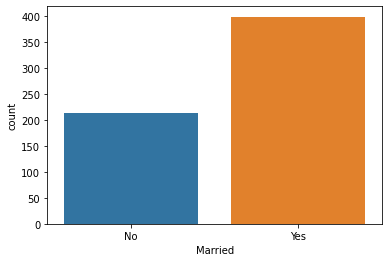

In [94]:
sns.countplot(df['Married'])

* Here data not distributed normally in these       columns.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

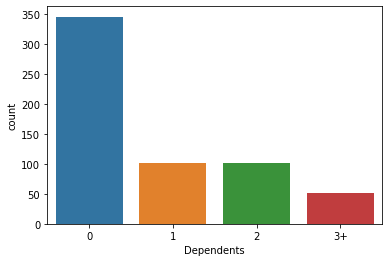

In [95]:
sns.countplot(df['Dependents'])

* Here data not distributed normally in these       columns.

<AxesSubplot:xlabel='Education', ylabel='count'>

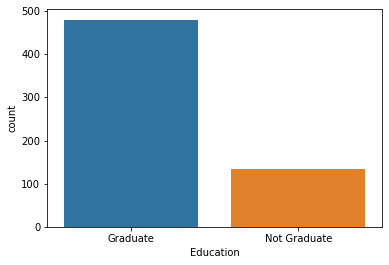

In [96]:
sns.countplot(df['Education'])

* Here data not distributed normally in these       columns.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

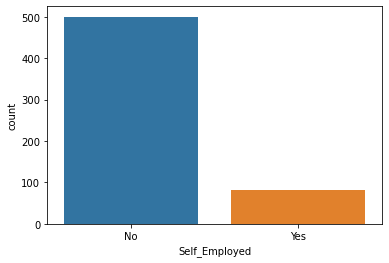

In [97]:
sns.countplot(df['Self_Employed'])

* Here data not distributed normally in these       columns.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

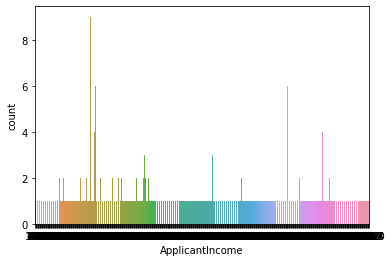

In [98]:
sns.countplot(df['ApplicantIncome'])

* Here data not distributed normally in these       columns.

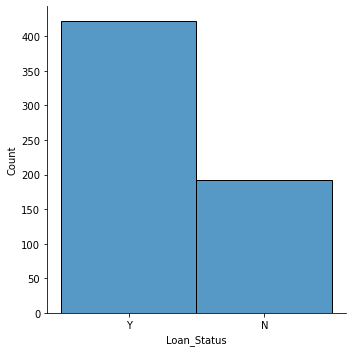

In [99]:
sns.displot(df['Loan_Status'])

* Here data not distributed normally in these       columns and viscuse problem.

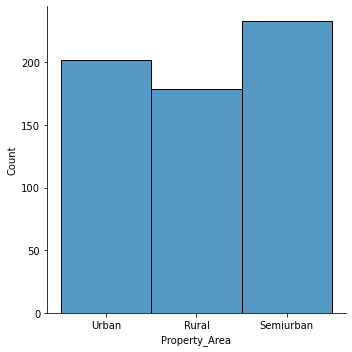

In [100]:
sns.displot(df['Property_Area'])

* Here data not distributed normally in these       columns and viscuse problem.

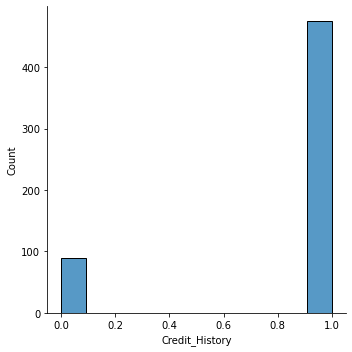

In [101]:
sns.displot(df['Credit_History'])

* Here data not distributed normally in these       columns.

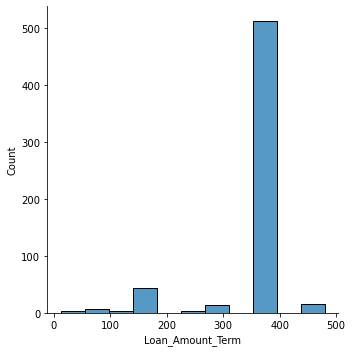

In [102]:
sns.displot(df['Loan_Amount_Term'])

* Here data not distributed normally in these       columns.

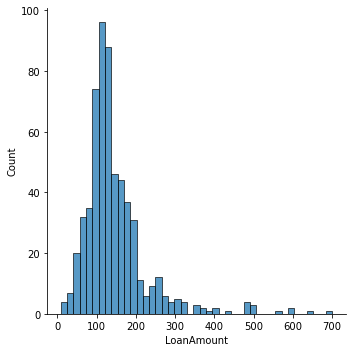

In [103]:
sns.displot(df['LoanAmount'])

* Here data not distributed normally in these       columns.

<AxesSubplot:>

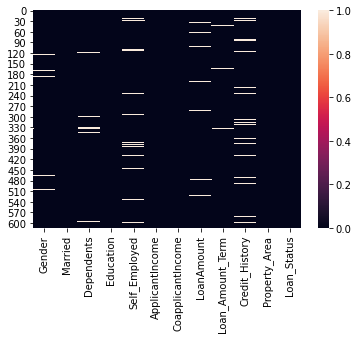

In [104]:
sns.heatmap(df.isnull())

* we can see there are some null values in almost   all the columns.

In [105]:
#cheking correlation 
dfcor=df.corr()
dfcor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

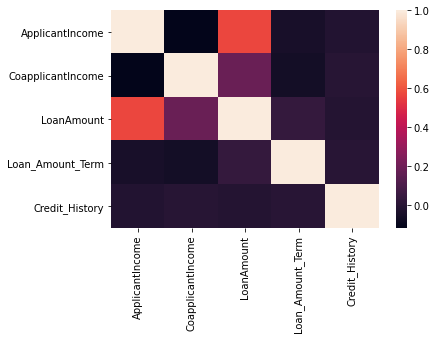

In [106]:
#ploting heatmap for correlation
sns.heatmap(dfcor)

* Heatmap contains the difference of corresponding   values of dataset.
* Light shades are higly correlated.

<AxesSubplot:>

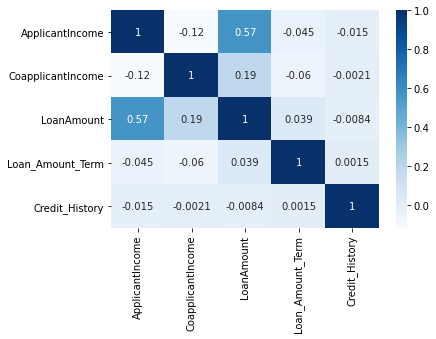

In [107]:
#ploting heatmap
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

* Dark shades are higly correlated

<AxesSubplot:>

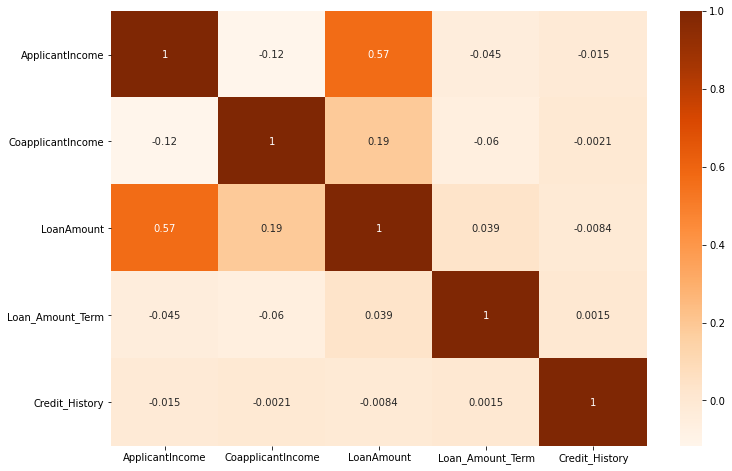

In [108]:
#ploting heatmap
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='Oranges',annot=True)

* Light shades are higly correlated
* Credit History is higly correlated with Loan       Amount Term
* Loan Amount Term is higly negatively correlated   with Loan Amount
* Loan Amount is higly positvely correlated with     Application Income
* Application Income is negatively correlated with   Credit History

# Plotting Outliers

In [109]:
#columns
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:>

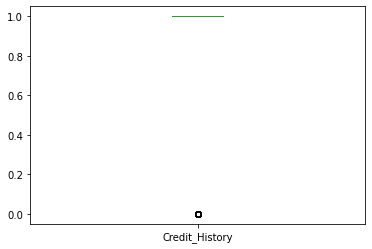

In [110]:
#ploting credit history
df['Credit_History'].plot.box()

* Viscous is outside so there is a outliers in credit history.

<AxesSubplot:>

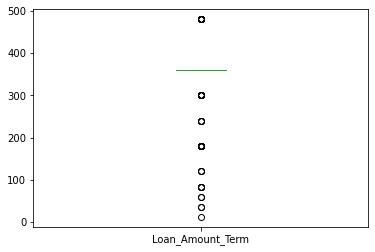

In [111]:
#ploting loan amount term
df['Loan_Amount_Term'].plot.box()

* Here Loan Amount Term have outside the viscous so we can find the outliers here.

<AxesSubplot:>

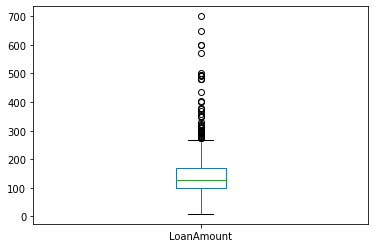

In [112]:
#ploting loan amount
df['LoanAmount'].plot.box()

* Here LoanAmount is outside the viscous so we can find outliers here.

<AxesSubplot:>

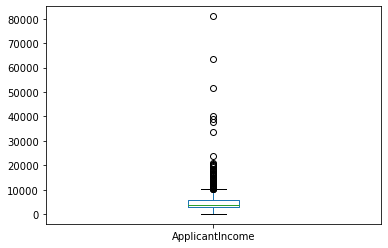

In [113]:
#ploting applicant income 
df['ApplicantIncome'].plot.box()

* Here applicant income is outside the viscous so we can find outliers here.

<AxesSubplot:>

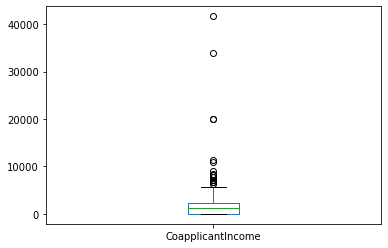

In [114]:
#ploting coapplicant income
df['CoapplicantIncome'].plot.box()

* Here co applicant income is outside the viscous so we can find outliers here.

In [115]:
#dataset shape
df.shape

(614, 12)

* There are 614 rows and 12 columns

## Checking Skewness of Dataset

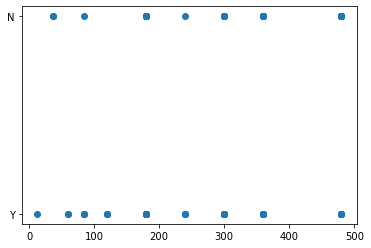

In [116]:
#ploting scatter to loan amount term and loan status
plt.scatter(df['Loan_Amount_Term'],df['Loan_Status'])

* we ca n see the values distributed in loan amount term and loan status

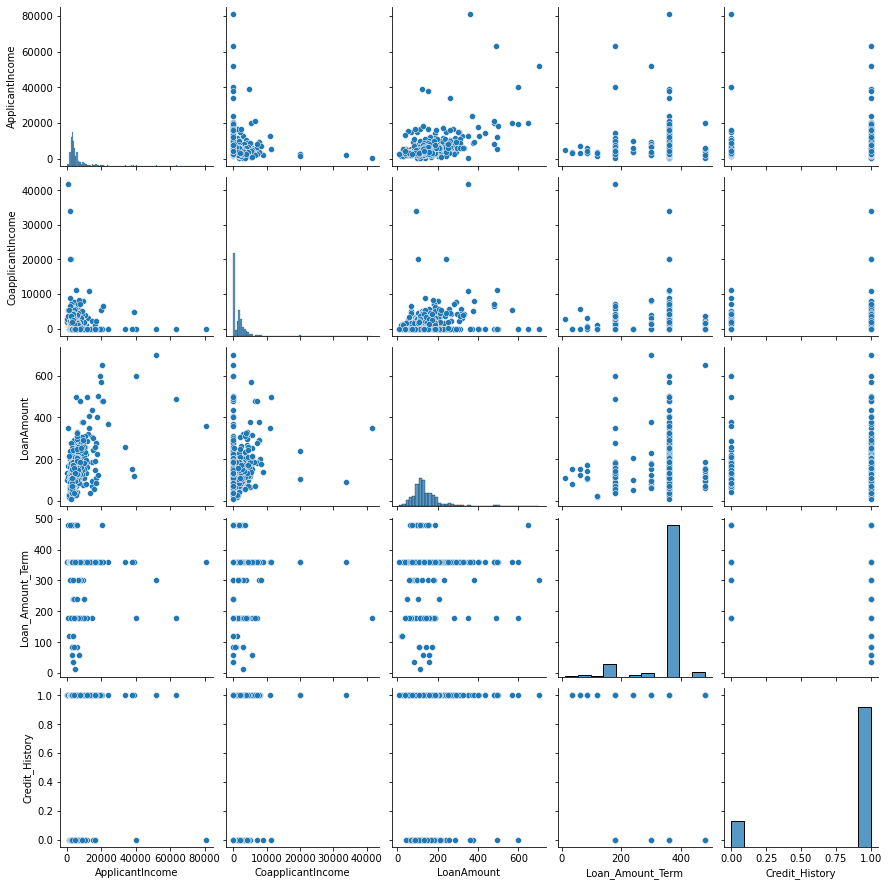

In [117]:
#ploting pairplot
sns.pairplot(df)

* Have to remove the missing values
* Have Drop the negative correlated
* Have to remove the outliers

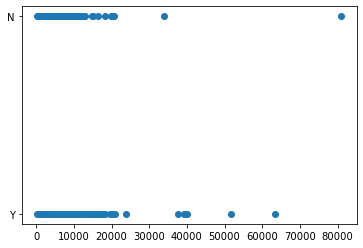

In [118]:
# plotting scatter to applicant income and loan status
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])
plt.show()

* We can see the destribution of applicant income and loan status

In [119]:
#droping Applicant income 
df.drop('ApplicantIncome',axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,0.0,141.0,360.0,1.0,Urban,Y


In [120]:
#data shape
df.shape

(614, 11)

* Now dataset contains 614 rows and 11 columns 

In [121]:
#data columns
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

* Dataset contains 11 columns

# Encoding Method

In [122]:
#importing sklearn preprocessing
from sklearn.preprocessing import LabelEncoder

In [123]:
#Encoding the dataset
df_encoded=pd.get_dummies(df,drop_first=True)
df_encoded.head()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


# Handling Missing Value

In [124]:
#checking null value
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* There are some null values in some columns

In [125]:
#writing for loop
for col in df.columns:
    missing_series=df[col][df[col].isna()==True]
    if missing_series.size>0:
        print(col,missing_series.size)
        plt.show()

Gender 13
Married 3
Dependents 15
Self_Employed 32
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50


In [126]:
#filling null values
categ_cols=['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History','Loan_Status']
for col in categ_cols:
    df[col]=df[col].fillna(df[col].mode()[0])
    df[col]=df[col].fillna(df[col].mode()[0])

In [127]:
#removieng dummies
dummy_cols=['Gender','Married','Dependents','Self_Employed','Education','Credit_History','Property_Area']
train_dummies=pd.get_dummies(df[dummy_cols],drop_first=True)
test_dummies=pd.get_dummies(df[dummy_cols],drop_first=True)

In [128]:
#filling nan values
num_cols=['CoapplicantIncome','Loan_Amount_Term','LoanAmount']
df_train_num=(df[num_cols]-df[num_cols].mean())/df[num_cols].std()
df_test_num=(df[num_cols]-df[num_cols].mean())/df[num_cols].std()

In [129]:
#concatinating
Loan_Status=df.Loan_Status.apply(lambda x:0 if x=='N' else 1)
df=pd.concat([df,train_dummies,Loan_Status],axis=1)
df=pd.concat([df,test_dummies],axis=1)

In [130]:
#droping null vales and filling with median
df_drop=df.dropna()
df_fill_median=df.fillna(df.median())
df_drop=df.dropna()
df_fill_median=df.fillna(df.median())
df_fill_median.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,Male,No,0,Graduate,No,0.0,NaN,360.0,1.0,Urban,...,1.0,1,0,0,0,0,0,0,0,1
1,Male,Yes,1,Graduate,No,1508.0,128.0,360.0,1.0,Rural,...,1.0,1,1,1,0,0,0,0,0,0
2,Male,Yes,0,Graduate,Yes,0.0,66.0,360.0,1.0,Urban,...,1.0,1,1,0,0,0,1,0,0,1
3,Male,Yes,0,Not Graduate,No,2358.0,120.0,360.0,1.0,Urban,...,1.0,1,1,0,0,0,0,1,0,1
4,Male,No,0,Graduate,No,0.0,141.0,360.0,1.0,Urban,...,1.0,1,0,0,0,0,0,0,0,1


# Label Encoding Method

In [131]:
#encoding gender
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Gender']=LE.fit_transform(df['Gender'])

In [132]:
df.Gender.unique()

array([1, 0])

In [133]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,1,No,0,Graduate,No,0.0,NaN,360.0,1.0,Urban,...,1.0,1,0,0,0,0,0,0,0,1
1,1,Yes,1,Graduate,No,1508.0,128.0,360.0,1.0,Rural,...,1.0,1,1,1,0,0,0,0,0,0
2,1,Yes,0,Graduate,Yes,0.0,66.0,360.0,1.0,Urban,...,1.0,1,1,0,0,0,1,0,0,1
3,1,Yes,0,Not Graduate,No,2358.0,120.0,360.0,1.0,Urban,...,1.0,1,1,0,0,0,0,1,0,1
4,1,No,0,Graduate,No,0.0,141.0,360.0,1.0,Urban,...,1.0,1,0,0,0,0,0,0,0,1


In [134]:
# encoding married
LE=LabelEncoder()
df['Married']=LE.fit_transform(df['Married'])

In [135]:
df.Married.unique()

array([0, 1])

In [136]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,Graduate,No,0.0,NaN,360.0,1.0,Urban,...,1.0,1,0,0,0,0,0,0,0,1
1,1,1,1,Graduate,No,1508.0,128.0,360.0,1.0,Rural,...,1.0,1,1,1,0,0,0,0,0,0
2,1,1,0,Graduate,Yes,0.0,66.0,360.0,1.0,Urban,...,1.0,1,1,0,0,0,1,0,0,1
3,1,1,0,Not Graduate,No,2358.0,120.0,360.0,1.0,Urban,...,1.0,1,1,0,0,0,0,1,0,1
4,1,0,0,Graduate,No,0.0,141.0,360.0,1.0,Urban,...,1.0,1,0,0,0,0,0,0,0,1


In [137]:
#encoding Education and Loan Status
LE=LabelEncoder()
df['Education']=LE.fit_transform(df['Education'])
df['Loan_Status']=df['Loan_Status'].replace({'N':0,'Y':1})


In [138]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,No,0.0,NaN,360.0,1.0,Urban,...,1.0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,No,1508.0,128.0,360.0,1.0,Rural,...,1.0,1,1,1,0,0,0,0,0,0
2,1,1,0,0,Yes,0.0,66.0,360.0,1.0,Urban,...,1.0,1,1,0,0,0,1,0,0,1
3,1,1,0,1,No,2358.0,120.0,360.0,1.0,Urban,...,1.0,1,1,0,0,0,0,1,0,1
4,1,0,0,0,No,0.0,141.0,360.0,1.0,Urban,...,1.0,1,0,0,0,0,0,0,0,1


In [139]:
df.Education.unique()

array([0, 1])

In [140]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,No,0.0,NaN,360.0,1.0,Urban,...,1.0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,No,1508.0,128.0,360.0,1.0,Rural,...,1.0,1,1,1,0,0,0,0,0,0
2,1,1,0,0,Yes,0.0,66.0,360.0,1.0,Urban,...,1.0,1,1,0,0,0,1,0,0,1
3,1,1,0,1,No,2358.0,120.0,360.0,1.0,Urban,...,1.0,1,1,0,0,0,0,1,0,1
4,1,0,0,0,No,0.0,141.0,360.0,1.0,Urban,...,1.0,1,0,0,0,0,0,0,0,1


In [144]:
#encoding self employed, loan amount and property area
LE=LabelEncoder()
df['Self_Employed']=LE.fit_transform(df['Self_Employed'])
df['LoanAmount']=LE.fit_transform(df['LoanAmount'])
df['Property_Area']=LE.fit_transform(df['Property_Area'])


In [145]:
df.Self_Employed.unique()

array([0, 1])

In [146]:
df.LoanAmount.unique()

array([203,  81,  26,  73,  94, 168,  48, 110, 119, 185,  28,  62, 139,
        67,   1,  78,  53,  34,  86,  68,  57, 181,  69,  65, 103, 135,
        75,  63,   5, 140,  32,  59, 182,  97, 129,  36,  12,  33,  87,
        49,  43,   9, 172,  50,  88, 126,  52, 116, 164,  79, 180,  89,
       121,  37, 132,  66, 124,  83,  64, 118, 167,  14, 145, 123,  84,
       133,   2,  90, 112, 150, 148,  47,  92, 104,  71, 130, 106,  40,
       165, 137,  46, 188, 128, 201,  55, 173,  39, 157,  82,   4, 159,
       200, 163,  51, 169,  74,  24, 202,  42,  54, 196,  27,  31, 166,
        61,  19,  13, 115, 120,  38,  45, 117,  77,  17,  20,  80, 147,
       156,  30,  21,  91,   8, 171,  93, 107,  76, 170, 136, 177, 184,
       102, 142, 193,  35,  16,  44,  96,  58,  85, 194,  18, 111, 176,
       189,  70,  29, 195, 122,  11, 151, 178, 154, 199, 190, 175, 108,
        56,  10,  25,  15, 187,  23, 149, 125, 155, 192, 100, 134, 101,
       105, 114, 152,  41, 153, 160, 198, 131,  72,  60, 144, 14

In [147]:
df.Property_Area.unique()

array([2, 0, 1])

In [148]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0.0,203,360.0,1.0,2,...,1.0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,0,1508.0,81,360.0,1.0,0,...,1.0,1,1,1,0,0,0,0,0,0
2,1,1,0,0,1,0.0,26,360.0,1.0,2,...,1.0,1,1,0,0,0,1,0,0,1
3,1,1,0,1,0,2358.0,73,360.0,1.0,2,...,1.0,1,1,0,0,0,0,1,0,1
4,1,0,0,0,0,0.0,94,360.0,1.0,2,...,1.0,1,0,0,0,0,0,0,0,1


In [149]:
#Encoding Dependents
LE=LabelEncoder()
df['Dependents']=LE.fit_transform(df['Dependents'])

In [150]:
df.Dependents.unique()

array([0, 1, 2, 3])

In [151]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0.0,203,360.0,1.0,2,...,1.0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,0,1508.0,81,360.0,1.0,0,...,1.0,1,1,1,0,0,0,0,0,0
2,1,1,0,0,1,0.0,26,360.0,1.0,2,...,1.0,1,1,0,0,0,1,0,0,1
3,1,1,0,1,0,2358.0,73,360.0,1.0,2,...,1.0,1,1,0,0,0,0,1,0,1
4,1,0,0,0,0,0.0,94,360.0,1.0,2,...,1.0,1,0,0,0,0,0,0,0,1


## Handling Missing Values

In [152]:
#checking null values
df.isnull().sum()

Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Loan_Status                0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Self_Employed_Yes          0
Education_Not Graduate     0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status                0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Self_Employed_Yes          0
Education_Not Graduate     0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [153]:
#filling null values
df['Gender']=df['Gender'].fillna(df['Gender'].mean())
df['Married']=df['Married'].fillna(df['Married'].median())

## Checking Skewness

In [154]:
df.skew()

Gender                    -1.648795
Married                   -0.644850
Dependents                 1.015551
Education                  1.367622
Self_Employed              2.159796
CoapplicantIncome          7.491531
LoanAmount                 0.555688
Loan_Amount_Term          -2.402112
Credit_History            -2.021971
Property_Area             -0.066196
Loan_Status               -0.809998
Credit_History            -2.021971
Gender_Male               -1.648795
Married_Yes               -0.644850
Dependents_1               1.798506
Dependents_2               1.814433
Dependents_3+              3.028961
Self_Employed_Yes          2.159796
Education_Not Graduate     1.367622
Property_Area_Semiurban    0.497948
Property_Area_Urban        0.729723
Loan_Status               -0.809998
Credit_History            -2.021971
Gender_Male               -1.648795
Married_Yes               -0.644850
Dependents_1               1.798506
Dependents_2               1.814433
Dependents_3+              3

* Dataset Skewness values

## Removing Outliers

In [155]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.52836225, 0.7820157 ,
        1.42814704],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.52836225, 0.7820157 ,
        0.70020801],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.52836225, 0.7820157 ,
        1.42814704],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.52836225, 0.7820157 ,
        1.42814704],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.52836225, 0.7820157 ,
        1.42814704],
       [2.11710719, 1.37208932, 0.73780632, ..., 0.52836225, 1.2787467 ,
        0.70020801]])

* Removed outliers of dataset

In [156]:
#removing outliers
z_scores=zscore(df)

abs_z_scores=np.abs(z_scores)
filtered_entries=(abs_z_scores < 3).all(axis=1)
new_df=df[filtered_entries]

new_df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0.0,203,360.0,1.0,2,...,1.0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,0,1508.0,81,360.0,1.0,0,...,1.0,1,1,1,0,0,0,0,0,0
2,1,1,0,0,1,0.0,26,360.0,1.0,2,...,1.0,1,1,0,0,0,1,0,0,1
3,1,1,0,1,0,2358.0,73,360.0,1.0,2,...,1.0,1,1,0,0,0,0,1,0,1
4,1,0,0,0,0,0.0,94,360.0,1.0,2,...,1.0,1,0,0,0,0,0,0,0,1


In [158]:
#data shape
df.shape

(614, 32)

* Dataset contains 614 rows and 32 columns

In [159]:
#new dataset shape
new_df.shape

(548, 32)

* New dataset contains 548 rows and 32 columns

## Standard Scaler Method

In [166]:
#importing stanard scaler method
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(df)
scaledX

array([[ 0.47234264, -1.37208932, -0.73780632, ..., -0.52836225,
        -0.7820157 ,  1.42814704],
       [ 0.47234264,  0.72881553,  0.25346957, ..., -0.52836225,
        -0.7820157 , -0.70020801],
       [ 0.47234264,  0.72881553, -0.73780632, ..., -0.52836225,
        -0.7820157 ,  1.42814704],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ..., -0.52836225,
        -0.7820157 ,  1.42814704],
       [ 0.47234264,  0.72881553,  1.24474546, ..., -0.52836225,
        -0.7820157 ,  1.42814704],
       [-2.11710719, -1.37208932, -0.73780632, ..., -0.52836225,
         1.2787467 , -0.70020801]])

* Here we can see scaleredX values 

In [167]:
#importing PCA
from sklearn.decomposition import PCA

textpca=PCA()
Y=textpca.fit(scaledX)

In [168]:
Y.explained_variance_ratio_

array([1.47428316e-01, 1.27944326e-01, 1.09810709e-01, 9.67603447e-02,
       9.07922055e-02, 7.55988408e-02, 7.21924177e-02, 6.87167215e-02,
       4.69921799e-02, 4.53112288e-02, 3.58507440e-02, 3.08740642e-02,
       2.84729090e-02, 2.32549932e-02, 7.77835775e-31, 3.66697151e-31,
       7.74603153e-32, 6.54872716e-32, 1.76264282e-32, 1.12067274e-32,
       6.47195259e-33, 5.72325209e-33, 4.04370571e-33, 8.90882070e-34,
       8.90882070e-34, 8.90882070e-34, 8.90882070e-34, 8.90882070e-34,
       8.90882070e-34, 6.64379357e-34, 5.97120418e-34, 8.31645826e-36])

In [170]:
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 14.74283163,  27.53726421,  38.51833507,  48.19436954,
        57.27359009,  64.83347417,  72.05271594,  78.92438809,
        83.62360608,  88.15472896,  91.73980336,  94.82720979,
        97.67450068, 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ])

In [171]:
#number of componets
k=np.argmax(var_cumu>99)
print('Number of comopents explaining 99% variance:',k)

Number of comopents explaining 99% variance: 13


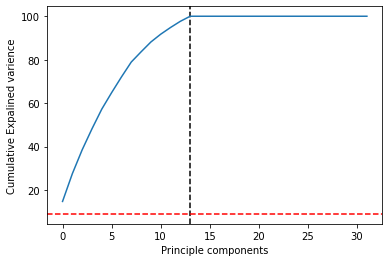

In [172]:
#ploting cumulative varience
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color='k',linestyle='--')
plt.axhline(y=9, color='r',linestyle='--')

plt.plot(var_cumu)
plt.show()

* Here y plot is cumalative explained varience and   xplot is principle components

# Model Building 

In [173]:
x_train=df.drop('Gender',axis=1)
y_train=df.Gender

In [174]:
#x train head
x_train.head()

,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,...,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,0,0.0,203,360.0,1.0,2,1,...,1.0,1,0,0,0,0,0,0,0,1
1,1,1,0,0,1508.0,81,360.0,1.0,0,0,...,1.0,1,1,1,0,0,0,0,0,0
2,1,0,0,1,0.0,26,360.0,1.0,2,1,...,1.0,1,1,0,0,0,1,0,0,1
3,1,0,1,0,2358.0,73,360.0,1.0,2,1,...,1.0,1,1,0,0,0,0,1,0,1
4,0,0,0,0,0.0,94,360.0,1.0,2,1,...,1.0,1,0,0,0,0,0,0,0,1


* x train contains 5 rows and 31 columns

In [175]:
#shape of x train 
x_train.shape

(614, 31)

* x train contains 614 rows and 31 columns

In [176]:
#shape of y train
y_train.shape

(614,)

* y train contains 614 rows no columns

In [177]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0.0,203,360.0,1.0,2,...,1.0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,0,1508.0,81,360.0,1.0,0,...,1.0,1,1,1,0,0,0,0,0,0
2,1,1,0,0,1,0.0,26,360.0,1.0,2,...,1.0,1,1,0,0,0,1,0,0,1
3,1,1,0,1,0,2358.0,73,360.0,1.0,2,...,1.0,1,1,0,0,0,0,1,0,1
4,1,0,0,0,0,0.0,94,360.0,1.0,2,...,1.0,1,0,0,0,0,0,0,0,1


# Classification Methods

In [178]:
#importing librery
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [179]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [183]:
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100,'at random_state',i)

72.9064039408867 at random_state 0
71.42857142857143 at random_state 1
68.96551724137932 at random_state 2
69.45812807881774 at random_state 3
69.45812807881774 at random_state 4
71.92118226600985 at random_state 5
73.39901477832512 at random_state 6
74.8768472906404 at random_state 7
71.92118226600985 at random_state 8
70.93596059113301 at random_state 9
68.4729064039409 at random_state 10
71.42857142857143 at random_state 11
67.48768472906403 at random_state 12
68.96551724137932 at random_state 13
66.99507389162561 at random_state 14
68.96551724137932 at random_state 15
70.93596059113301 at random_state 16
74.8768472906404 at random_state 17
73.39901477832512 at random_state 18
67.98029556650246 at random_state 19
67.48768472906403 at random_state 20
72.9064039408867 at random_state 21
67.48768472906403 at random_state 22
71.42857142857143 at random_state 23
66.50246305418719 at random_state 24
69.45812807881774 at random_state 25
66.50246305418719 at random_state 26
69.9507389162561

In [184]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.30,random_state=0)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=1
print('Best accuracy is',maxAccu,'on Random_State',maxRS)

Best accuracy is 0.7621621621621621 on Random_State 1


In [187]:
# Decision tree classifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

print('Decision Tree Classifier: \n\n',classification_report(y_test,y_pred_dt))
print('Test Accuracy:{}%'.format(round(dt.score(x_test,y_test)*100,2)))

Decision Tree Classifier: 

               precision    recall  f1-score   support

           0       0.85      0.79      0.82       134
           1       0.85      0.79      0.82       134

   micro avg       0.85      0.79      0.82       268
   macro avg       0.85      0.79      0.82       268
weighted avg       0.85      0.79      0.82       268
 samples avg       0.57      0.57      0.57       268

Test Accuracy:75.14%


* The test accuracy of Decision Tree Classifier is 74.59%

In [188]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue=0
best_score=0
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
                                best_score=knn.score(x_train,y_train)
            
print('Best KNN Value:{}'.format(best_Kvalue))
print('Test Accuracy:{}'.format(round(best_score*100,2)))

Best KNN Value:0
Test Accuracy:100.0


In [189]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

print('KNN Classifier: \n\n',classification_report(y_test,y_pred_knn))
print('Test Accuracy:{}%'.format(round(knn.score(x_test,y_test)*100,2)))

KNN Classifier: 

               precision    recall  f1-score   support

           0       0.73      0.87      0.79       134
           1       0.73      0.87      0.79       134

   micro avg       0.73      0.87      0.79       268
   macro avg       0.73      0.87      0.79       268
weighted avg       0.73      0.87      0.79       268
 samples avg       0.63      0.63      0.63       268

Test Accuracy:67.03%


* The test accuracy of KNN classifier is 67.03%

In [193]:
#Random forest classifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

print('Random Forest Classifier: \n\n',classification_report(y_test,y_pred_rf))
print('Test accuracy:{}%'.format(round(rf.score(x_test,y_test)*100,2)))

Random Forest Classifier: 

               precision    recall  f1-score   support

           0       0.82      0.90      0.85       134
           1       0.82      0.90      0.85       134

   micro avg       0.82      0.90      0.85       268
   macro avg       0.82      0.90      0.85       268
weighted avg       0.82      0.90      0.85       268
 samples avg       0.65      0.65      0.65       268

Test accuracy:77.84%


* The test accuracy of Random forest classifier is 77.84%

# Cross Value Correction Method

In [194]:
from sklearn.model_selection import cross_val_score

In [195]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.7067572970811675


In [196]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.6775689724110356


In [197]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.7556843929095028


# Hyperparameter Tunning

In [203]:
from sklearn.model_selection import GridSearchCV

In [204]:
param_grid={
    'max_depth':[6,7,8],
    'max_features':['auto','sqrt'],
    'n_estimators':[200,300],
    'criterion' :['gini','entropy']
}

In [205]:
rf=RandomForestClassifier()

In [206]:
rf_cv=GridSearchCV(rf, param_grid, cv=5)

In [207]:
rf_cv.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300]})

# AUC ROC Curve

In [208]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [209]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
y_pred_prob=rf.predict_proba(x_test)
y_pred_prob

[array([[0.16, 0.84],
        [0.  , 1.  ],
        [0.28, 0.72],
        [0.08, 0.92],
        [0.  , 1.  ],
        [0.89, 0.11],
        [0.1 , 0.9 ],
        [0.79, 0.21],
        [0.8 , 0.2 ],
        [0.02, 0.98],
        [0.06, 0.94],
        [0.11, 0.89],
        [0.29, 0.71],
        [0.01, 0.99],
        [0.  , 1.  ],
        [0.05, 0.95],
        [0.3 , 0.7 ],
        [0.09, 0.91],
        [0.25, 0.75],
        [0.94, 0.06],
        [0.99, 0.01],
        [0.02, 0.98],
        [0.04, 0.96],
        [0.27, 0.73],
        [0.53, 0.47],
        [0.38, 0.62],
        [0.43, 0.57],
        [0.03, 0.97],
        [0.74, 0.26],
        [0.99, 0.01],
        [0.17, 0.83],
        [0.56, 0.44],
        [0.09, 0.91],
        [0.76, 0.24],
        [0.66, 0.34],
        [0.79, 0.21],
        [0.03, 0.97],
        [0.04, 0.96],
        [0.02, 0.98],
        [0.04, 0.96],
        [0.16, 0.84],
        [0.81, 0.19],
        [0.  , 1.  ],
        [0.18, 0.82],
        [0.05, 0.95],
        [0

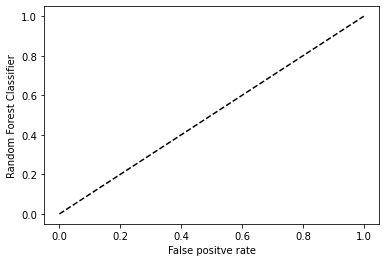

In [210]:
plt.plot([0,1],'k--')
plt.plot(label='Random Forest Classifier')
plt.xlabel('False positve rate')
plt.ylabel('Random Forest Classifier')
plt.show()

* The Random Forest Classifier plot contains xlabel is false positive rate and y label is positive rate.

# Evaluate The Final Model

In [211]:
Final_mod=RandomForestClassifier()
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

76.75675675675676


### Saving The Model

In [213]:
import joblib
joblib.dump(Final_mod,'Loan Prediction.csv')

['Loan Prediction.csv']

* Saving The Model as csv

## Prediction Method

In [214]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
preds=rf.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]
[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]]


* The train and test data is balanced most classification method hit the 76.75% accuracy eith the dataset.